In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pickle
import glob
import numpy as np
import os
import time
import sys
import matplotlib.pyplot as plt
import tarfile

import tensorflow as tf
from PIL import Image
from scipy.misc import imresize

from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from cifar10mod import CIFAR10

escalando imagenes...


/home/plantacarnivora/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


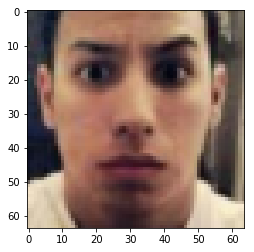

In [4]:



# importar etiquetas e imagenes
filelist = glob.glob('UTKFace/*.jpg', recursive=True)

imagenes = np.array([np.array(Image.open(fname)) for fname in filelist])


def prepare_image(image, target_height=64, target_width=64):
    image = imresize(image, (target_width, target_height))
    return image



In [3]:
print(filelist[1])

UTKFace/40_0_2_20170116191436037.jpg.chip.jpg


In [ ]:
# IMAGENES REESCALADAS A 64
print('escalando imagenes...')
imagenes_chicas=[]
edad=[]
genero=[]
raza=[]
for i in range(imagenes.__len__()):
    if 14<=int(filelist[i].split('_')[0].split('/')[1])<=59:
        edad.append(int(filelist[i].split('_')[0].split('/')[1]))
        genero.append(int(filelist[i].split('_')[1]))
        raza.append(int(filelist[i].split('_')[2]))
        imagenes_chicas.append(prepare_image(imagenes[i]))
imagenes_chicas = np.array(imagenes_chicas)
imgplot = plt.imshow(imagenes_chicas[0])
edad=np.array(edad)
genero=np.array(genero)
raza=np.array(raza)

# Exploración del dataset

In [ ]:
h_blancos = np.zeros(117,dtype=int)
h_negros = np.zeros(117,dtype=int)
h_asiaticos = np.zeros(117,dtype=int)
h_indios = np.zeros(117,dtype=int)
h_otros = np.zeros(117,dtype=int)
m_blancos = np.zeros(117,dtype=int)
m_negros = np.zeros(117,dtype=int)
m_asiaticos = np.zeros(117,dtype=int)
m_indios = np.zeros(117,dtype=int)
m_otros = np.zeros(117,dtype=int)
for ident in range(genero.__len__()):
    if genero[ident]==0:
        if raza[ident]==0:
            e=edad[ident]
            h_blancos[e]+=1
        elif raza[ident]==1:
            e=edad[ident]
            h_negros[e]+=1
        elif raza[ident]==2:
            e=edad[ident]
            h_asiaticos[e]+=1
        elif raza[ident]==3:
            e=edad[ident]
            h_indios[e]+=1   
        elif raza[ident]==4:
            e=edad[ident]
            h_otros[e]+=1 
    elif genero[ident]==1:
        if raza[ident]==0:
            e=edad[ident]
            m_blancos[e]+=1
        elif raza[ident]==1:
            e=edad[ident]
            m_negros[e]+=1
        elif raza[ident]==2:
            e=edad[ident]
            m_asiaticos[e]+=1
        elif raza[ident]==3:
            e=edad[ident]
            m_indios[e]+=1   
        elif raza[ident]==4:
            e=edad[ident]
            m_otros[e]+=1 
            

In [ ]:
plt.plot(h_blancos[0:40],label="blancos")
plt.plot(h_negros[0:40],label="negros")
plt.plot(h_asiaticos[0:40],label="asiaticos")
plt.plot(h_indios[0:40],label="indios")
plt.plot(h_otros[0:40],label="otros")
plt.ylabel('Cantidad de datos')
plt.xlabel('Edad')
plt.title('Distribución de razas por edad en Hombres')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.plot(m_blancos[0:40],label="blanca")
plt.plot(m_negros[0:40],label="negra")
plt.plot(m_asiaticos[0:40],label="asiatica")
plt.plot(m_indios[0:40],label="india")
plt.plot(m_otros[0:40],label="otra")
plt.ylabel('Cantidad de datos')
plt.xlabel('Edad')
plt.title('Distribución de razas por edad en Mujeres')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
plt.plot(h_blancos,label="blancos")
plt.plot(h_negroslabel="negros")
plt.plot(h_asiaticos,label="asiaticos")
plt.plot(h_indios,label="indios")
plt.plot(h_otros,label="otros")
plt.ylabel('Cantidad de datos')
plt.xlabel('Edad')
plt.title('Distribución de razas por edad en Hombres')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.plot(m_blancos,label="blancas")
plt.plot(m_negros,label="negras")
plt.plot(m_asiaticos,label="asiaticas")
plt.plot(m_indios,label="indias")
plt.plot(m_otros,label="otras")
plt.ylabel('Cantidad de datos')
plt.xlabel('Edad')
plt.title('Distribución de razas por edad en Mujeres')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Guardar datos


In [5]:
imagenes_chicas.shape


(17524, 64, 64, 3)

In [6]:
datos1 = {'data': imagenes_chicas[0:5541],
         'labels':np.transpose([edad[0:5541],genero[0:5541],raza[0:5541]])
          }

filename1="datos1.pkl"
file1=open(filename1,'wb')
pickle.dump(datos1,file1)
file1.close()


datos2 = {'data': imagenes_chicas[5541:11082],
         'labels':np.transpose([edad[5541:11082],genero[5541:11082],raza[5541:11082]])
          }

filename2="datos2.pkl"
file2=open(filename2,'wb')
pickle.dump(datos2,file2)
file2.close()

datos3 = {'data': imagenes_chicas[11082:16624],
         'labels':np.transpose([edad[11082:16624],genero[11082:16624],raza[11082:16624]])
          }

filename3="datos3.pkl"
file3=open(filename3,'wb')
pickle.dump(datos3,file3)
file3.close()

datos4 = {'data': imagenes_chicas[16624:17524],
         'labels':np.transpose([edad[16624:17524],genero[16624:17524],raza[16624:17524]])
          }
filename4="datos4.pkl"
file4=open(filename4,'wb')
pickle.dump(datos4,file4)
file4.close()


In [ ]:
for i in range(1,4):
    print(i)

# Definición de función que importa los datos

esta parte del codigo hace de decifrador de datos, esto se hace ya 
que puede ser mucho consumo computacional hacer las imagenes a arreglos
nuevamente.


In [ ]:
DIR_BINARIES = 'Datos/'


def unpickle(filename):
    f = open(filename, 'rb')
    dic = pickle.load(f, encoding='latin1')
    f.close()
    return dic


def batch_to_bc01(batch):
    ''' Converts CIFAR sample to bc01 tensor'''
    return batch.reshape([-1, 3, 64, 64])                   # CAMBIADO SHAPE 32 POR 64


def batch_to_b01c(batch):
    ''' Converts CIFAR sample to b01c tensor'''
    return batch_to_bc01(batch).transpose(0, 2, 3, 1)


def labels_to_one_hot(labels):
    ''' Converts list of integers to numpy 2D array with one-hot encoding'''
    N = len(labels)
    one_hot_labels = np.zeros([N, 2], dtype=int)# CAMBIADO 10 CLASES POR 2
    one_hot_labels[np.arange(N),labels]= 1
    return one_hot_labels


class CIFAR10:
    def __init__(self, batch_size=100, validation_proportion=0.1, test_proportion=0.1, augment_data=False):

        # Training set
        train_data_list = []
        train_labels_list = []
        for bi in range(1,6):
            d = unpickle(DIR_BINARIES+'datos'+str(bi)+'.pkl')
            train_data_list.append(d['data'])
            train_labels_list.append(d['labels'])
        self.train_data = np.concatenate(train_data_list, axis=0).astype(np.float32)
        self.train_labels = np.concatenate(train_labels_list, axis=0).astype(np.uint8)

        # Check set
        check_proportion=validation_proportion + test_proportion
        assert check_proportion > 0. and check_proportion < 1.
        self.train_data, self.check_data, self.train_labels, self.check_labels = train_test_split(
            self.train_data, self.train_labels, test_size=check_proportion, random_state=1)

        # Validation set and Test set
        self.test_data, self.validation_data, self.test_labels, self.validation_labels = train_test_split( 
            self.check_data, self.check_labels, test_size=validation_proportion, random_state=1)


        # Normalize data
        mean = self.train_data.mean(axis=0)
        std = self.train_data.std(axis=0)
        self.train_data = (self.train_data - mean) / std
        self.validation_data = (self.validation_data - mean) / std
        self.test_data = (self.test_data - mean) / std

        # Converting to b01c and one-hot encoding
        self.train_data = batch_to_b01c(self.train_data)
        self.validation_data = batch_to_b01c(self.validation_data)
        self.test_data = batch_to_b01c(self.test_data)
        
        self.train_labels_edad = np.transpose(self.train_labels)[0]
        self.validation_labels_edad = np.transpose(self.validation_labels)[0]
        self.test_labels_edad = np.transpose(self.test_labels)[0]
        
        self.train_labels_raza = np.transpose(self.train_labels)[2]
        self.validation_labels_raza = np.transpose(self.validation_labels)[2]
        self.test_labels_raza = np.transpose(self.test_labels)[2]
        
        self.train_labels_genero =np.transpose(self.train_labels)[1]
        self.validation_labels_genero =np.transpose(self.validation_labels)[1]
        self.test_labels_genero = np.transpose(self.test_labels)[1]
        
        self.train_labels_genero = labels_to_one_hot(self.train_labels_genero)
        self.validation_labels_genero = labels_to_one_hot(self.validation_labels_genero)
        self.test_labels_genero = labels_to_one_hot(self.test_labels_genero)

        np.random.seed(seed=1)
        self.augment_data = augment_data

        # Batching & epochs
        self.batch_size = batch_size
        self.n_batches = len(self.train_labels_genero) // self.batch_size
        self.current_batch = 0
        self.current_epoch = 0

    def nextBatch(self):
        ''' Returns a tuple with batch and batch index '''
        start_idx = self.current_batch * self.batch_size
        end_idx = start_idx + self.batch_size
        batch_data = self.train_data[start_idx:end_idx]
        batch_labels_genero = self.train_labels_genero[start_idx:end_idx]
        batch_labels_raza = self.train_labels_raza[start_idx:end_idx]
        batch_labels_edad = self.train_labels_edad[start_idx:end_idx]
        batch_idx = self.current_batch

        if self.augment_data:
            if np.random.randint(0, 2) == 0:
                batch_data = batch_data[:, :, ::-1, :]
            batch_data += np.random.randn(self.batch_size, 1, 1, 3) * 0.05

        # Update self.current_batch and self.current_epoch
        self.current_batch = (self.current_batch + 1) % self.n_batches
        if self.current_batch != batch_idx + 1:
            self.current_epoch += 1

            # shuffle training data
            new_order = np.random.permutation(np.arange(len(self.train_labels_genero)))
            self.train_data = self.train_data[new_order]
            self.train_labels_genero = self.train_labels_genero[new_order]
            self.train_labels_raza = self.train_labels_raza[new_order]
            self.train_labels_edad = self.train_labels_edad[new_order]

        return ((batch_data, batch_labels_genero, batch_labels_raza, batch_labels_edad), batch_idx)

    def getEpoch(self):
        return self.current_epoch

    # TODO: refactor getTestSet and getValidationSet to avoid code replication
    def getTestSet(self, asBatches=False):
        if asBatches:
            batches = []
            for i in range(len(self.test_labels_genero) // self.batch_size):
                start_idx = i * self.batch_size
                end_idx = start_idx + self.batch_size
                batch_data = self.test_data[start_idx:end_idx]
                batch_labels_genero = self.test_labels_genero[start_idx:end_idx]
                batch_labels_raza = self.test_labels_raza[start_idx:end_idx]
                batch_labels_edad = self.test_labels_edad[start_idx:end_idx]

                batches.append((batch_data, batch_labels_genero, batch_labels_raza, batch_labels_edad))
            return batches
        else:
            return (self.test_data, self.test_labels_genero, self.test_labels_raza, self.test_labels_edad)

    def getValidationSet(self, asBatches=False):
        if asBatches:
            batches = []
            for i in range(len(self.validation_labels_genero) // self.batch_size):
                start_idx = i * self.batch_size
                end_idx = start_idx + self.batch_size
                batch_data = self.validation_data[start_idx:end_idx]
                batch_labels_genero = self.validation_labels_genero[start_idx:end_idx]
                batch_labels_raza = self.validation_labels_raza[start_idx:end_idx]
                batch_labels_edad = self.validation_labels_edad[start_idx:end_idx]

                batches.append((batch_data, batch_labels_genero, batch_labels_raza, batch_labels_edad))
            return batches
        else:
            return (self.validation_data, self.validation_labels_genero, self.validation_labels_raza, self.validation_labels_edad)

    def shuffleValidation(self):
        new_order = np.random.permutation(np.arange(len(self.validation_labels_genero)))
        self.validation_labels_genero = self.validation_labels_genero[new_order]
        self.validation_labels_raza = self.validation_labels_raza[new_order]
        self.validation_labels_edad = self.validation_labels_edad[new_order]
        self.validation_data = self.validation_data[new_order]

    def reset(self):
        self.current_batch = 0
        self.current_epoch = 0


if __name__ == '__main__':
    cifar10 = CIFAR10(batch_size=1000)
    while cifar10.getEpoch() < 2:
        batch, batch_idx = cifar10.nextBatch()
#         print(batch_idx, cifar10.n_batches, cifar10.getEpoch())
    batch= cifar10.getTestSet(asBatches=True)
#     print(len(batch))
    for ba in batch:
        data ,genero, raza,etnia=ba
        print(genero)
    data, genero, raza, edad = cifar10.getValidationSet()
#     print(genero.sum(axis=0))
    data, genero, raza, edad = cifar10.getTestSet()
#     print(genero.sum(axis=0))

# Convnet

In [ ]:

tf.set_random_seed(1)
sess = tf.Session()

In [ ]:
# Load dataset
batch_size = 1000
cifar10 = CIFAR10(batch_size=batch_size, validation_proportion=0.1, test_proportion=0.1, augment_data=False)


In [ ]:
# Model blocks
def conv_layer(input_tensor, kernel_shape, layer_name):
    # input_tensor b01c
    # kernel_shape 01-in-out
    weights = tf.get_variable("weights", kernel_shape,
                               initializer = tf.contrib.layers.xavier_initializer_conv2d())
    biases = tf.get_variable("biases", [kernel_shape[3]],
                             initializer=tf.constant_initializer(0.05))
    
    tf.summary.histogram(layer_name + "/weights", weights)
    tf.summary.histogram(layer_name + "/biases", biases)
    
    # Other options are to use He et. al init. for weights and 0.01 
    # to init. biases.
    conv = tf.nn.conv2d(input_tensor, weights, 
                       strides = [1, 1, 1, 1], padding='SAME')
    return tf.nn.relu(conv + biases)

def fc_layer(input_tensor, weights_shape, layer_name):
    # weights_shape in-out
    weights = tf.get_variable("weights", weights_shape,
                              initializer = tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable("biases", [weights_shape[1]],
                             initializer=tf.constant_initializer(0.0))
    tf.summary.histogram(layer_name + "/weights", weights)
    tf.summary.histogram(layer_name + "/biases", biases)
    mult_out = tf.matmul(input_tensor, weights)
    return tf.nn.relu(mult_out+biases)


In [ ]:
"""## Elija aquí el directorio donde guardará los registros de Tensorboard"""
PARENT_DIR = './summaries/'
SUMMARIES_DIR = PARENT_DIR + 'conv_2_layer_with_dropout'


In [ ]:
# Model
use_convnet = True
n_conv_layers = 2

n_filters_convs = [32, 64, 128]

model_input = tf.placeholder(tf.float32, name='model_input', 
                             shape=(batch_size, 64, 64, 3))

keep_prob = tf.placeholder(tf.float32, name='dropout_prob', shape=())

target = tf.placeholder(tf.float32, name='target', shape=(batch_size, 2))

if use_convnet:
    layer_input = model_input
    previous_n_feature_maps = 3
    for layer_index in range(n_conv_layers):
      layer_name = 'conv%d' % layer_index
      with tf.variable_scope(layer_name):
        conv_out = conv_layer(
            layer_input, 
            [5, 5, previous_n_feature_maps, n_filters_convs[layer_index]], 
            layer_name)
      if layer_index == 0:
        with tf.variable_scope(layer_name, reuse=True):
          conv1_filters = tf.get_variable("weights")
          tf.summary.image(
              'conv1_filters',
              tf.transpose(conv1_filters, perm=[3, 0, 1, 2]),
              max_outputs=n_filters_convs[layer_index]
          )
      previous_n_feature_maps = n_filters_convs[layer_index]
      pool_out = tf.nn.max_pool(
          conv_out, 
          ksize=[1, 2, 2, 1],
          strides=[1, 2, 2, 1],
          padding='SAME',
          name='pool%d' % layer_index)
      layer_input = pool_out
     

    fc_input = tf.layers.flatten(pool_out, name='fc_input')

    feature_map_height = int(64 / (2**n_conv_layers))
    
    # First fully connected layer
    layer_name = 'fc1'
    with tf.variable_scope(layer_name):
        fc1_out = fc_layer(
            fc_input, 
            [(feature_map_height**2)*previous_n_feature_maps, 50], 
            layer_name)

    fc1_out_drop = tf.nn.dropout(fc1_out, keep_prob)

    # Second fully connected layer
    layer_name = 'fc2'
    with tf.variable_scope(layer_name):
        fc2_out = fc_layer(fc1_out_drop, [50, 2], layer_name)
    model_output = fc2_out
        
else:
    # Reshape tensor to MLP
    first_layer_input = tf.reshape(model_input, [-1,3072], name='first_layer_input')

    # First layer
    layer_name = 'fc1'
    with tf.variable_scope(layer_name):
        fc1_out = fc_layer(first_layer_input, [3072, 100], layer_name)

    fc1_out_drop = tf.nn.dropout(fc1_out, keep_prob)

    # Second layer
    layer_name = 'fc2'
    with tf.variable_scope(layer_name):
        fc2_out = fc_layer(fc1_out_drop, [100, 10], layer_name)
    model_output = fc2_out

with tf.name_scope('loss_function'):
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=model_output, labels=target,
                                           name='cross_entropy'))
    xentropy_summary = tf.summary.scalar('cross_entropy', cross_entropy)


In [ ]:
# Optimization
with tf.name_scope('optimizer'):
    optimizer = tf.train.RMSPropOptimizer(0.0005)
    grads_vars = optimizer.compute_gradients(cross_entropy)
    optimizer.apply_gradients(grads_vars)
    train_step = optimizer.minimize(cross_entropy)

# Metrics
correct_prediction = tf.equal(tf.argmax(model_output, 1),
                             tf.argmax(target, 1))


In [ ]:
# Useful training functions
def validate():
    cifar10.shuffleValidation()
    batches = cifar10.getValidationSet(asBatches=True)
    accs = []
    xent_vals = []
    for batch in batches:
        data, genero, raza, edad = batch
        acc, xentropy_val = sess.run((accuracy, cross_entropy),
                       feed_dict={
                model_input: data,
                target: genero,
                keep_prob: 1.0
            })
        accs.append(acc)
        xent_vals.append(xentropy_val)
    mean_xent = np.array(xent_vals).mean()    
    mean_acc = np.array(accs).mean()
    summary = sess.run(
        merged,
        feed_dict={
            model_input: data,
            target: genero,
            keep_prob: 1.0
        })
    return summary, mean_acc, mean_xent
def test():
    batches = cifar10.getTestSet(asBatches=True)
    accs = []
    for batch in batches:
        data, genero, raza, edad = batch
        acc = sess.run(accuracy,
                       feed_dict={
                model_input: data,
                target: genero,
                keep_prob: 1.0
            })
        accs.append(acc)
    mean_acc = np.array(accs).mean()
    return mean_acc


In [ ]:

# Tensorboard writers
train_writer = tf.summary.FileWriter(SUMMARIES_DIR+'/train',
                                     sess.graph)
validation_writer = tf.summary.FileWriter(SUMMARIES_DIR+'/validation')


In [ ]:

sess.run(tf.global_variables_initializer())
cifar10.reset()
print("Trainable variables")
for n in tf.trainable_variables():
    print(n.name)

if use_convnet:
    epochs = 30 #DEBERIAMOS SUBIR ESTE VALOR
else:
    epochs = 50
    
t_i = time.time()
n_batches = cifar10.n_batches
val_acc_vals = []
test_acc_vals = []
while cifar10.getEpoch() < epochs:
    epoch = cifar10.getEpoch()
    batch, batch_idx = cifar10.nextBatch()
    batch_data = batch[0]
    batch_genero = batch[1]
    batch_raza = batch[2]
    batch_edad = batch[3]
    
    # just a training iteration
    _ = sess.run(train_step,
                feed_dict={
            model_input: batch_data,
            target: batch_genero,
            keep_prob: 0.8 ###### Modifique el dropout aqui y solo aqui. #####
        })
    
    step = batch_idx+epoch*n_batches
    
    # Write training summary
    if step%50==0:
        summary = sess.run(learning_summaries,
                          feed_dict={
                model_input: batch_data,
                target: batch_genero,
                keep_prob: 1.0 # set to 1.0 at inference time
            })
        train_writer.add_summary(summary, step)
        
    # gradient (by layer) statistics over last training batch & validation summary
    if batch_idx==0:
        loss, acc, grads = sess.run((cross_entropy, accuracy, grads_vars), 
                      feed_dict={
            model_input: batch_data,
            target: batch_genero,
            keep_prob: 1.0
        })
        
        summary, validation_accuracy, validation_loss = validate()
        validation_writer.add_summary(summary, step)
        print('[Epoch %d, it %d] Training acc. %.3f, loss %.3f. \
Valid. acc. %.3f, loss %.3f' % (
            epoch,
            step,
            acc,
            loss,
            validation_accuracy,
            validation_loss
        ))
        val_acc_vals.append(validation_accuracy)
        test_accuracy = test()
        test_acc_vals.append(test_accuracy)
        print("Time elapsed %.2f minutes" % ((time.time()-t_i)/60.0))
train_writer.flush()
validation_writer.flush()

val_acc_vals = np.array(val_acc_vals)
test_acc_vals = np.array(test_acc_vals)
best_epoch = np.argmax(val_acc_vals)
test_acc_at_best = test_acc_vals[best_epoch]
print('*'*30)
print("Testing set accuracy @ epoch %d (best validation acc): %.4f" % (best_epoch, test_acc_at_best))
print('*'*30)

print('TP = ', np.count_nonzero(TP_cast == 1))
print('FP = ', np.count_nonzero(FP_cast == 1))
print('FP = ', np.count_nonzero(FN_cast == 1))
print('TN = ', np.count_nonzero(TN_cast == 1))